In [3]:
import numpy as np
import os, random
from skimage import io 
import matplotlib.pyplot as plt

In [4]:
folder = "data/"

In [5]:
def equation_generator(numbers=2, max_num=100):
    assert numbers > 1, "You need at least two numbers to generate a valid equation"
    # Generate numbers and operator
    generated_eqn = []
    operators = ['+', '-', '*']
    for number in range(numbers):
        gen_num = np.random.randint(max_num)
        generated_eqn.append(str(gen_num))
        operator_ind = np.random.randint(len(operators))
        operator = operators[operator_ind]
        generated_eqn.append(operator)
    # Remove the last operator and turn into string
    generated_eqn = generated_eqn[:-1]
    generated_eqn = ''.join(generated_eqn)
    ans = eval(generated_eqn)
    ans_string = '='+str(ans)
    return generated_eqn+ans_string
eqn = equation_generator(numbers=2, max_num=100)
print(eqn)

26-16=10


In [6]:
def random_sample_file(directory):
    #  Randomly selects a file from a directory
    n=0
    random.seed();
    for root, dirs, files in os.walk(directory):
        for name in files:
            n += 1
            if random.uniform(0, n) < 1:
                rfile=os.path.join(root, name)
    return rfile
def generate_eqn_image(folder, eqn):
    eqn_array = []
    # 1. Pick correct file
    for char in eqn:
        if char == "*": char = 'times'
        char_folder = f"{folder}/{char}"
        file = random_sample_file(char_folder) # Randomly sample an image from the directory, each (45X45)
        img = io.imread(file)
        eqn_array.append(img)
    # 2. Concatenate all images together into 1 giant image
    eqn = np.hstack(eqn_array)
    return eqn
generate_eqn_image(folder, eqn)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 254, 254, ..., 255, 255, 255],
       [253, 252, 255, ..., 255, 255, 255],
       [254, 255, 253, ..., 255, 255, 255]], dtype=uint8)

In [7]:
output_folder = "equation_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

76+76=152


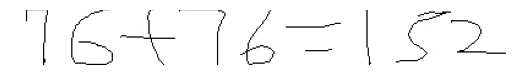

11-75=-64


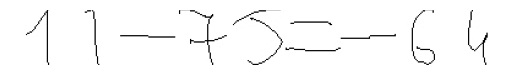

27-43=-16


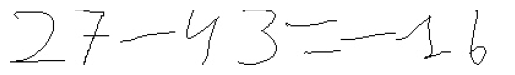

99+27=126


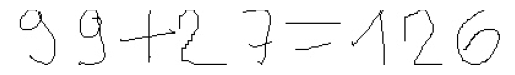

84-48=36


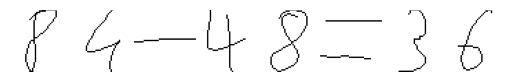

67+48=115


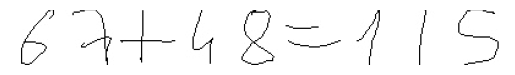

50-98=-48


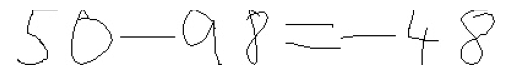

38*48=1824


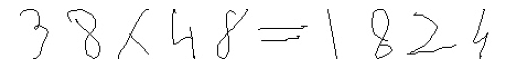

14-7=7


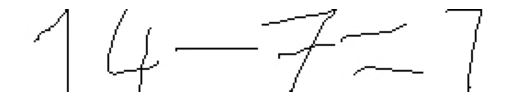

44*59=2596


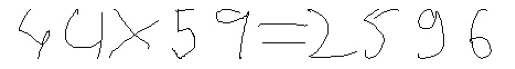

54-87=-33


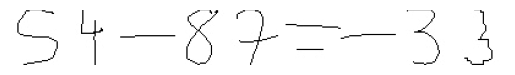

95+31=126


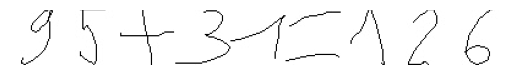

92*45=4140


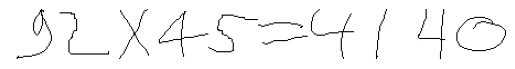

56-60=-4


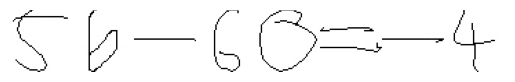

56-62=-6


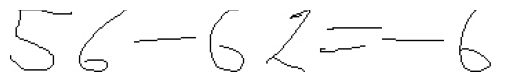

19-92=-73


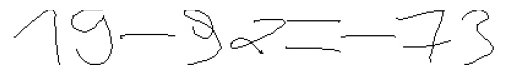

19+35=54


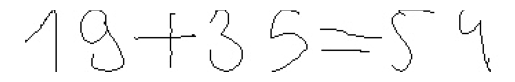

39+23=62


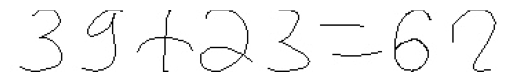

17-57=-40


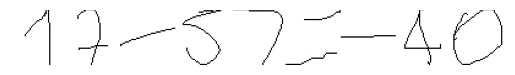

91-72=19


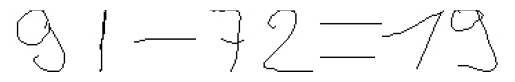

79*43=3397


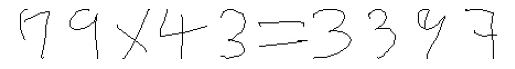

11*34=374


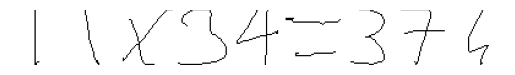

4+40=44


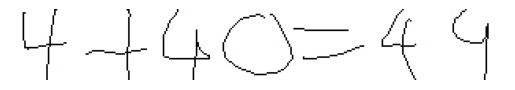

31*19=589


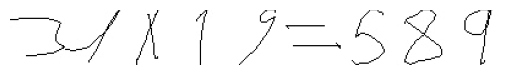

3+16=19


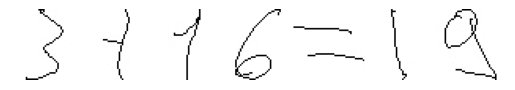

63-23=40


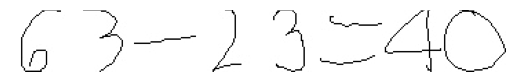

94+10=104


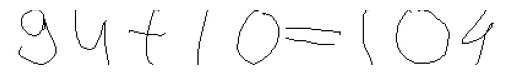

53-46=7


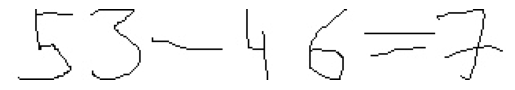

67+10=77


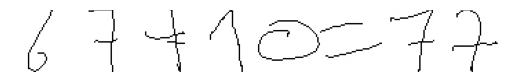

8*86=688


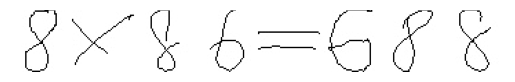

67-9=58


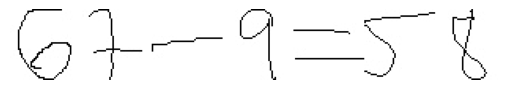

23-29=-6


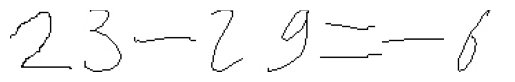

81+83=164


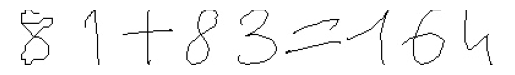

27-11=16


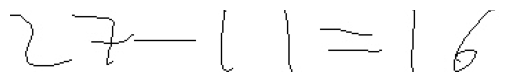

24*13=312


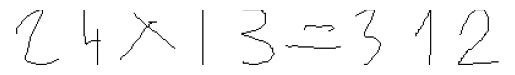

98+10=108


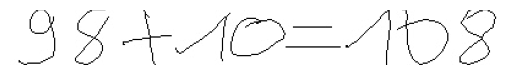

56+82=138


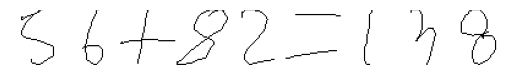

4+30=34


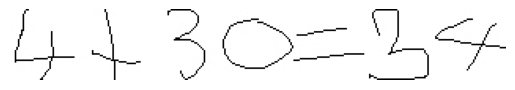

63*24=1512


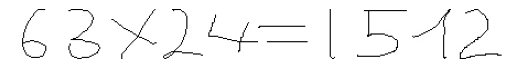

46-18=28


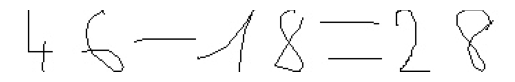

79-9=70


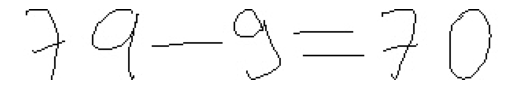

98*76=7448


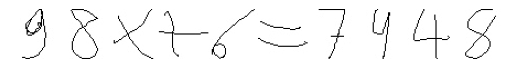

60+98=158


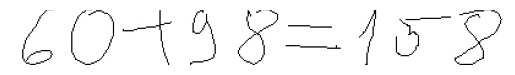

11+51=62


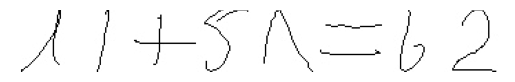

80+97=177


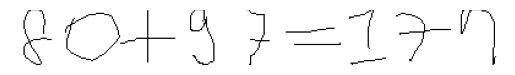

6*85=510


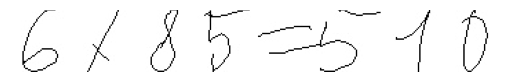

24*26=624


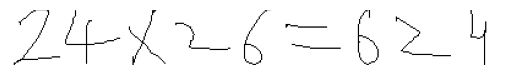

76-22=54


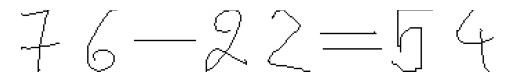

69-92=-23


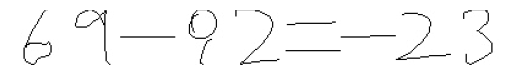

54*2=108


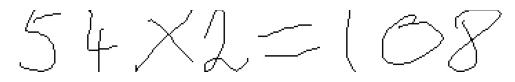

In [8]:
EQNS = 50
NUMBERS = 2 # We generate a set for two numbers
MAX_NUM = 100
SAVE = 1
for i in range(EQNS):
    eqn = equation_generator(numbers=NUMBERS, max_num=MAX_NUM)
    print(eqn)
    eqn_array = generate_eqn_image(folder, eqn)
    filename = f"{NUMBERS}numbers_{str(i).zfill(3)}.png"
    plt.imshow(eqn_array, cmap="gray")
    plt.axis('off')
    plt.savefig(output_folder+"/"+filename)
    plt.show()